In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
df = pd.read_csv("spam.csv",encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.rename({"v1":"lable","v2":"text"},inplace=True,axis=1)

In [7]:
df.tail()

,lable,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['lable'] = le.fit_transform(df['lable'])
y = df['lable']
X = df['text']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [10]:
x_train

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: text, Length: 4457, dtype: object

In [11]:
print("Before OverSampling, counts of lable '1': {}".format(sum(y_train ==1)))
print("Before OverSampling, counts of lable '0': {} \n".format(sum(y_train == 0)))
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# x_train_res, y_train_res = sm.fit_resample(x_train, y_train.raval())
# print('After OverSampling, the shape of train_x: {} '.format(x_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of lable '1': 581
Before OverSampling, counts of lable '0': 3876 



In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GASCCS23\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [14]:
import re
corpus = []
length = len(df) 

In [15]:
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)

In [16]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [18]:
import pickle
pickle.dump(cv, open('cv1.pk1', 'wb'))

In [19]:
df.describe()

,lable
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
df.shape

(5572, 5)

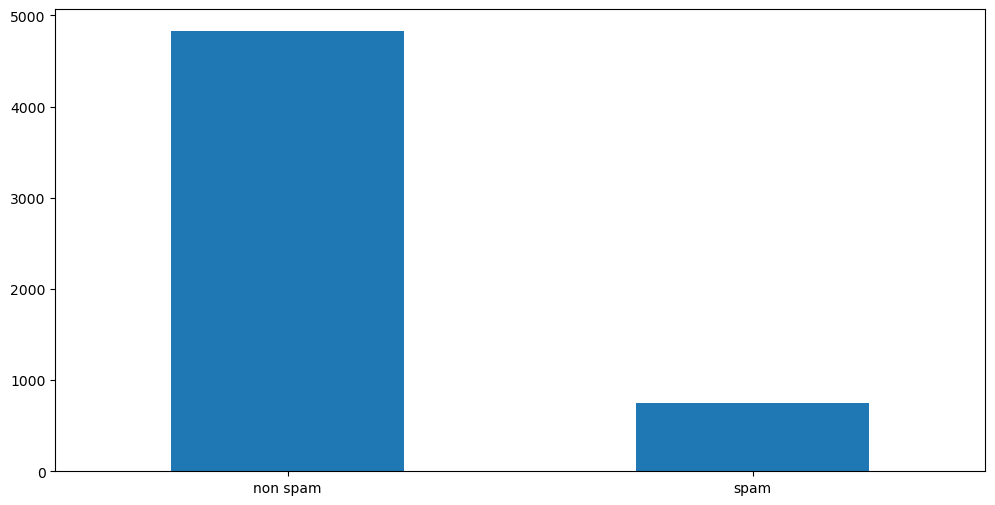

In [21]:
df["lable"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('non spam', 'spam'),rotation=0);

In [22]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_bal=sc.fit_transform(X)
# x_bal = pd.DataFrame(x_bal)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [25]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [26]:
from sklearn.ensemble import RandomForestClassifier
model1 =RandomForestClassifier()
model1.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
RandomForestClassifier()

RandomForestClassifier()

In [28]:
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()

In [29]:
model.fit(x_train, y_train)

MultinomialNB()

In [30]:
 MultinomialNB

sklearn.naive_bayes.MultinomialNB

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model = Sequential()

In [41]:
x_train.shape

(4457, 7163)

In [42]:
model.add(Dense(units =x_train.shape[1],activation="relu",kernel_initializer="random_uniform"))

In [43]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [44]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [45]:
model.add(Dense(units=1,activation="sigmoid"))

In [46]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [47]:
generator = model.fit(x_train, y_train,epochs=10,steps_per_epoch=len(x_train)//64)

Epoch 1/10
69/69 [==============================] - 67s 895ms/step - loss: 0.1576 - accuracy: 0.9554
Epoch 2/10
69/69 [==============================] - 58s 844ms/step - loss: 0.0066 - accuracy: 0.9982
Epoch 3/10
69/69 [==============================] - 58s 838ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 4/10
69/69 [==============================] - 58s 836ms/step - loss: 3.2633e-04 - accuracy: 1.0000
Epoch 5/10
69/69 [==============================] - 58s 843ms/step - loss: 9.9362e-05 - accuracy: 1.0000
Epoch 6/10
69/69 [==============================] - 58s 848ms/step - loss: 6.4709e-05 - accuracy: 1.0000
Epoch 7/10
69/69 [==============================] - 59s 862ms/step - loss: 4.3521e-05 - accuracy: 1.0000
Epoch 8/10
69/69 [==============================] - 59s 855ms/step - loss: 3.1069e-05 - accuracy: 1.0000
Epoch 9/10
69/69 [==============================] - 59s 860ms/step - loss: 2.3374e-05 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 59s 857ms/step

In [48]:
y_pred=model.predict(x_test)
y_pred

35/35 [==============================] - 6s 33ms/step


array([[5.8226783e-12],
       [2.1026846e-05],
       [1.4567069e-12],
       ...,
       [1.0731280e-07],
       [2.5747346e-13],
       [9.0983861e-12]], dtype=float32)

In [49]:
y_pr = np.where(y_pred>0.5,1,0)

In [50]:
y_test

4456    0
690     0
944     0
3768    0
1189    0
       ..
2906    0
1270    0
3944    0
2124    0
253     0
Name: lable, Length: 1115, dtype: int32

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pr)
score = accuracy_score(y_test,y_pr)
print(cm)
print('Accuracy Score Is:- ' ,score*100)

[[948   1]
 [ 13 153]]
Accuracy Score Is:-  98.7443946188341


In [55]:

def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]',' ',new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in  set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_x_test = cv.transform(new_corpus).toarray()
    print(new_x_test)
    new_y_pred = model.predict(new_x_test)
    print(new_y_pred)
    new_x_pred = np.where(new_y_pred>0.5,1,0)
    return new_y_pred
new_review = new_review(str(input("Enter new review...")))


Enter new review...hello fg hou hkl
[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 4s 4s/step
[[0.00268606]]


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pr)
score = accuracy_score(y_test,y_pr)
print(cm)
print('Accuracy Score Is Naive Bayes:- ' ,score*100)

[[948   1]
 [ 13 153]]
Accuracy Score Is Naive Bayes:-  98.7443946188341


In [60]:
cm = confusion_matrix(y_test, y_pr)
score = accuracy_score(y_test,y_pr)
print(cm)
print('Accuracy Score Is:- ' ,score*100)



[[948   1]
 [ 13 153]]
Accuracy Score Is:-  98.7443946188341


In [61]:
model.save('spam.h5')

In [69]:
from flask import Flask,render_template,request
import pickle
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.models import load_model
loaded_model = load_model('spam.h5')
cv = pickle.load(open('cv1.pk1','rb'))
app = Flask(__name__)
@app.route('/')
def home():
    return render_template('home.html')
@app.route('/Spam',methods=['POST','GET'])
def prediction():
    return render_template('spam.html')
@app.route('/predict',methods=['POST'])
def predict():
    if request.method == 'POST':
        message = request.form['message']
        data = message
    
    new_review = str(data)
    print(new_review)
    new_review = re.sub('[^a-zA-Z]', ' ',new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    print(new_X_test)
    new_y_pred =  loaded_model.predict(new_X_test)
    new_X_pred = np.where(new_y_pred>0.5,1,0)
    print(new_X_pred)
    if new_review[0][0]==1:
        return render_template('result.html', prediction="Spam")
    else :
        return render_template('result.html', prediction="Not a Spam")


In [71]:
import os
if __name__=="__main__":
    
    port=int(os.environ.get('PORT',5000))
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2023-04-21 12:41:32,537] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\GASCCS23\AppData\Local\Temp\ipykernel_1416\2211322710.py", line 14, in home
    return render_template('home.html')
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\templating.py", line 146, in render_template
    template =